In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#filepath
file_path = '/Volumes/SHAYNE SSD/Project_Datasets/used_car/vehicles.csv'

#datframe
df = pd.read_csv(file_path)

df.info()
df.head()

In [ ]:
columns_to_drop = [
    'id', 'url', 'region', 'region_url', 'VIN', 'image_url', 
    'description', 'county', 'state', 'lat', 'long', 'paint_color', 'size',
    'posting_date'
]

df_cleaned = df.drop(columns = columns_to_drop)
df_cleaned.info()

In [ ]:
#find age of car
current_year = df_cleaned['year'].max() + 1

df_cleaned['car_age'] = current_year - df_cleaned['year']
df_cleaned = df_cleaned.drop(columns = ['year'])

df_cleaned.info()

In [ ]:
df_cleaned.head()

In [28]:
missing_data = df_cleaned.isnull().sum()
print(missing_data)

price                0
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
drive           130567
type             92858
car_age           1205
dtype: int64


In [37]:
print(len(df_cleaned))

df_cleaned = df_cleaned.dropna(subset = ['price', 'odometer'])

print(f"after dropping rows: {len(df_cleaned)}")
print(df_cleaned.isnull().sum())

422480
after dropping rows: 422480
price                0
manufacturer     17397
model             5195
condition       171619
cylinders       174778
fuel              2372
odometer             0
title_status      7602
transmission      1695
drive           129080
type             91904
car_age           1136
dtype: int64


In [41]:
columns_to_fill = df_cleaned.isnull().sum()
columns_to_fill = columns_to_fill[columns_to_fill > 0].index.tolist()

print(columns_to_fill)

for col in columns_to_fill:
    df_cleaned[col].fillna('Uknown', inplace = True)
    print(f"filled NaN in {col} with 'unknown'")
print(df_cleaned.isnull().sum())

[]
price           0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
type            0
car_age         0
dtype: int64


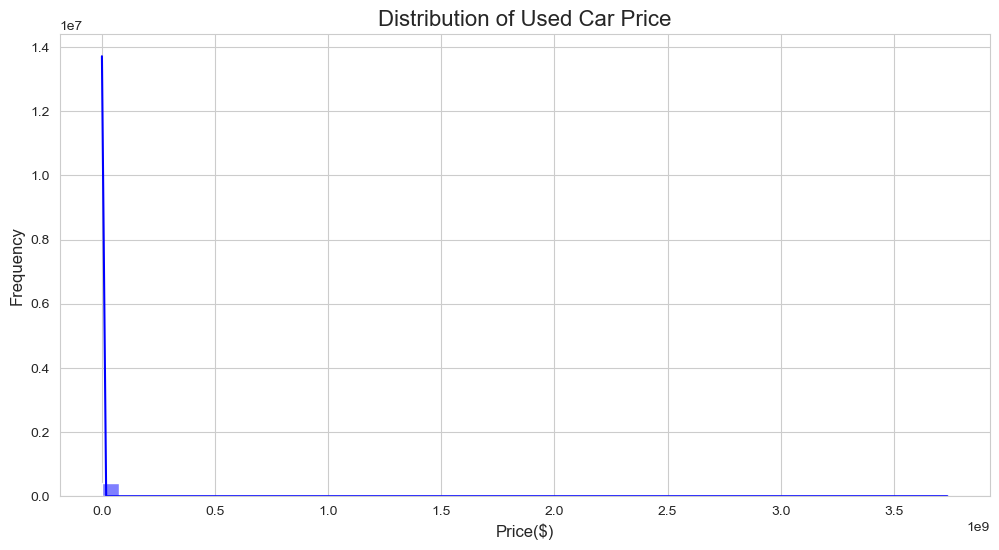

ori number of rows: 422480
number afte cleaned: 377210
cleaned number of rows: 45270


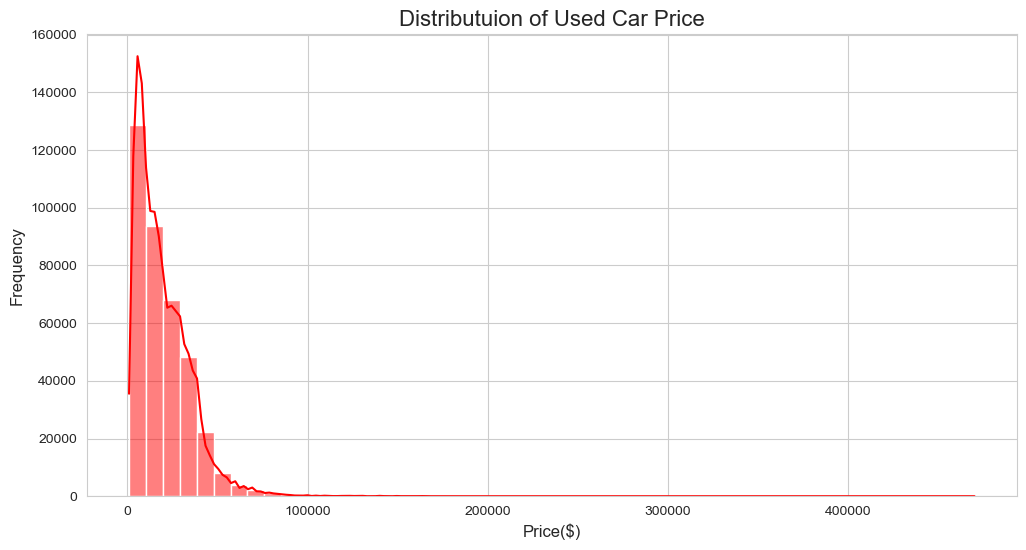

In [49]:
#EDA

sns.set_style('whitegrid')
plt.figure(figsize = (12,6))
sns.histplot(df_cleaned['price'], kde = True, bins = 50, color = 'blue')
plt.title('Distribution of Used Car Price', fontsize = 16)
plt.xlabel('Price($)', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.show()

price_min = 1000
price_max = 500000

df_filtered = df_cleaned[
    (df_cleaned['price'] > price_min) &
    (df_cleaned['price'] < price_max)
].copy()

print(f'ori number of rows: {len(df_cleaned)}')
print(f'number afte cleaned: {len(df_filtered)}')
print(f'cleaned number of rows: {len(df_cleaned)-len(df_filtered)}')

sns.set_style('whitegrid')
plt.figure(figsize = (12,6))
sns.histplot(df_filtered['price'], kde = True, bins = 50, color = 'red')
plt.title('Distributuion of Used Car Price', fontsize = 16)
plt.xlabel('Price($)', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.show()